In [4]:

import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
#t_u = torch.tensor(t_u)
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape
t_u

tensor([[35.7000],
        [55.9000],
        [58.2000],
        [81.9000],
        [56.3000],
        [48.9000],
        [33.9000],
        [21.8000],
        [48.4000],
        [60.4000],
        [68.4000]])

In [15]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 8,  4,  3,  5,  6,  7,  0,  1, 10]), tensor([2, 9]))

In [31]:
tu_train = t_u[train_indices]
tc_train = t_c[train_indices]

tu_val = t_u[val_indices]
tc_val = t_c[val_indices]

tun_train = 0.1 * tu_train
tun_val = 0.1 * tu_val

In [17]:
import torch.nn as nn

In [18]:
linear_model=nn.Linear(1,1)
linear_model(tun_train)

tensor([[-5.5302],
        [-6.2994],
        [-8.7921],
        [-5.5789],
        [-4.1184],
        [-2.9402],
        [-4.2936],
        [-6.2605],
        [-7.4776]], grad_fn=<AddmmBackward0>)

In [11]:
linear_model

Linear(in_features=1, out_features=1, bias=True)

In [12]:
linear_model.weight

Parameter containing:
tensor([[-0.5889]], requires_grad=True)

In [13]:
linear_model.bias

Parameter containing:
tensor([0.8736], requires_grad=True)

In [19]:
x = torch.ones(1)
linear_model(x)

tensor([-1.7912], grad_fn=<AddBackward0>)

In [20]:
x

tensor([1.])

In [21]:
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [22]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.9737]], requires_grad=True),
 Parameter containing:
 tensor([-0.8176], requires_grad=True)]

In [26]:
def training_loop(epochs, opt, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(epochs):
        tp_train=model(tu_train)
        loss_train=loss_fn(tp_train, tc_train)
        
        tp_val=model(tu_val)
        loss_val=loss_fn(tp_val, tc_val)
        
        opt.zero_grad()
        loss_train.backward()
        opt.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [27]:
def loss_fn(tp, tc):
    squared_diffs=(tp-tc)**2
    return squared_diffs.mean()

In [40]:
linear_model=nn.Linear(1,1)
optimizer=optim.Adam(linear_model.parameters(), 0.01)

In [41]:
training_loop(10000, optimizer, linear_model, loss_fn, tun_train, tun_val, tc_train, tc_val)



Epoch 0, Training loss 40.9062, Validation loss 5.7587
Epoch 1, Training loss 38.8930, Validation loss 3.6545
Epoch 1000, Training loss 11.9592, Validation loss 2.0287
Epoch 2000, Training loss 4.2139, Validation loss 2.5735
Epoch 3000, Training loss 2.9881, Validation loss 2.9202
Epoch 4000, Training loss 2.9342, Validation loss 3.0121
Epoch 5000, Training loss 2.9339, Validation loss 3.0187
Epoch 6000, Training loss 2.9339, Validation loss 3.0191
Epoch 7000, Training loss 2.9339, Validation loss 3.0270
Epoch 8000, Training loss 2.9339, Validation loss 3.0191
Epoch 9000, Training loss 2.9339, Validation loss 3.0191


In [42]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.5416]], requires_grad=True),
 Parameter containing:
 tensor([-17.4325], requires_grad=True)]

In [43]:
plt.plot(0.5x-17)

SyntaxError: invalid syntax (2420397808.py, line 1)

In [54]:
x=[1.0,2.0,3.0,4.0,5.0]
#x=torch.tensor(x).unsqueeze(1)
#y=linear_model(x)

In [55]:
y=[-16.8909,
        -16.3492,
        -15.8076,
        -15.2659,
        -14.7243]

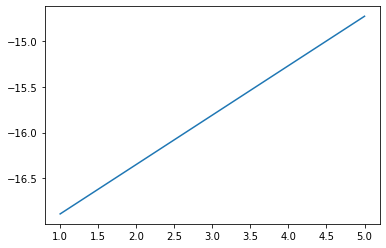

In [56]:
import matplotlib.pyplot as plt
plt.plot(x,y)

seq_model=nn.Sequential(nn.Linear(1,13), nn.Tanh(), nn.Linear(1,13))

In [58]:
seq_model=nn.Sequential(nn.Linear(1,13), nn.Tanh(), nn.Linear(1,13))

seq_model

In [59]:
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=13, bias=True)
)

In [62]:
[params.name for params in seq_model.parameters()]

[None, None, None, None]

In [63]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))


In [64]:
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [69]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

In [70]:
tu_train = t_u[train_indices]
tc_train = t_c[train_indices]

tu_val = t_u[val_indices]
tc_val = t_c[val_indices]

tun_train = 0.1 * tu_train
tun_val = 0.1 * tu_val

In [73]:
seq_model.output_linear.bias

Parameter containing:
tensor([1.4949], requires_grad=True)

In [87]:
linear_model=nn.Linear(1,1)

In [88]:
def training_loop(epochs, opt, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(epochs):
        tp_train=model(tu_train)
        loss_train=loss_fn(tp_train, tc_train)
        
        tp_val=model(tu_val)
        loss_val=loss_fn(tp_val, tc_val)
        
        opt.zero_grad()
        loss_train.backward()
        opt.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
            
def loss_fn(tp, tc):
    squared_diffs=(tp-tc)**2
    return squared_diffs.mean()

In [102]:
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

In [105]:
opt=optim.SGD(seq_model.parameters(), 0.1)

training_loop(10000, opt, seq_model, loss_fn, tun_train, tun_val, tc_train, tc_val)

#print('output', seq_model(tun_val))
#print('answer', tc_val)
print('hidden', seq_model.hidden_linear.weight.grad)






Epoch 0, Training loss 90.7284, Validation loss 19.2994
Epoch 1, Training loss 90.7284, Validation loss 19.2994
Epoch 1000, Training loss 90.7284, Validation loss 19.2994
Epoch 2000, Training loss 90.7284, Validation loss 19.2994
Epoch 3000, Training loss 90.7284, Validation loss 19.2994
Epoch 4000, Training loss 90.7284, Validation loss 19.2994
Epoch 5000, Training loss 90.7284, Validation loss 19.2994
Epoch 6000, Training loss 90.7284, Validation loss 19.2994
Epoch 7000, Training loss 90.7284, Validation loss 19.2994
Epoch 8000, Training loss 90.7284, Validation loss 19.2994
Epoch 9000, Training loss 90.7284, Validation loss 19.2994
hidden tensor([[0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [0.0000e+00],
        [9.4456e-06]])


In [104]:
tun_train

tensor([[4.8400],
        [5.6300],
        [8.1900],
        [4.8900],
        [3.3900],
        [2.1800],
        [3.5700],
        [5.5900],
        [6.8400]])

In [9]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

tu_train = t_u[train_indices]
tc_train = t_c[train_indices]

tu_val = t_u[val_indices]
tc_val = t_c[val_indices]

tun_train = 0.1 * tu_train
tun_val = 0.1 * tu_val
tc_train

tensor([[28.0000],
        [ 8.0000],
        [ 6.0000],
        [14.0000],
        [11.0000],
        [-4.0000],
        [ 0.5000],
        [15.0000],
        [21.0000]])

In [53]:
import torch.nn as nn
from collections import OrderedDict

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

tu_train = t_u[train_indices]
tc_train = t_c[train_indices]

tu_val = t_u[val_indices]
tc_val = t_c[val_indices]

tun_train = 0.1 * tu_train
tun_val = 0.1 * tu_val

def training_loop(epochs, opt, model, loss_fn, tu_train, tu_val, tc_train, tc_val):
    for epoch in range(epochs):
        tp_train=model(tu_train)
        loss_train=loss_fn(tp_train, tc_train)
        
        tp_val=model(tu_val)
        loss_val=loss_fn(tp_val, tc_val)
        
        opt.zero_grad()
        loss_train.backward()
        opt.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            
            #print("PARAMS: "+str(list(model.parameters()))+"\n"+"TRAIN LOSS: "+str(loss_train.item())+"\n"+"VAL LOSS: "+str(loss_val.item()))
            print("TRAIN LOSS: "+str(loss_train.item())+"VAL LOSS: "+str(loss_val.item())+"\n")
            #print(f"Epoch {epoch}, Training loss {loss_train:.4f},"
            #      f" Validation loss {loss_val.item():.4f}")
            
    return model.parameters(), loss_train, loss_val
            
def loss_fn(tp, tc):
    squared_diffs=(tp-tc)**2
    return squared_diffs.mean()

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))
#seq_model = nn.Sequential(OrderedDict([
#    ('hidden_linear', nn.Linear(1, 8)),
#    ('hidden_activation1', nn.Tanh()),
#    ('hidden_activation2', nn.Linear(8, 8)),
#    ('hidden_activation3', nn.Tanh()),
#    ('hidden_activation4', nn.Linear(8, 8)),
#    ('hidden_activation5', nn.Tanh()),
#    ('output_linear', nn.Linear(8, 1)),
#]))
optimizer=optim.Adam(seq_model.parameters(), lr=1e-2)


#linear_model=nn.Linear(1,1)
#optimizer=optim.Adam(linear_model.parameters(), lr=1e-2)

training_loop(10000, optimizer, seq_model, nn.MSELoss(), tu_train, tu_val, tc_train, tc_val)

TRAIN LOSS: 203.1642303466797VAL LOSS: 37.66148376464844

TRAIN LOSS: 201.06924438476562VAL LOSS: 37.44137954711914

TRAIN LOSS: 13.363469123840332VAL LOSS: 47.765052795410156

TRAIN LOSS: 4.4639363288879395VAL LOSS: 27.573801040649414

TRAIN LOSS: 2.666025161743164VAL LOSS: 18.47639274597168

TRAIN LOSS: 2.2305290699005127VAL LOSS: 13.959704399108887

TRAIN LOSS: 3.0759875774383545VAL LOSS: 11.111836433410645

TRAIN LOSS: 2.0405406951904297VAL LOSS: 10.10716438293457

TRAIN LOSS: 2.0226693153381348VAL LOSS: 9.222441673278809

TRAIN LOSS: 2.0166125297546387VAL LOSS: 8.716472625732422

TRAIN LOSS: 2.013758420944214VAL LOSS: 8.395315170288086



(<generator object Module.parameters at 0x7fca7a411cf0>,
 tensor(2.0126, grad_fn=<MseLossBackward0>),
 tensor(8.2532, grad_fn=<MseLossBackward0>))

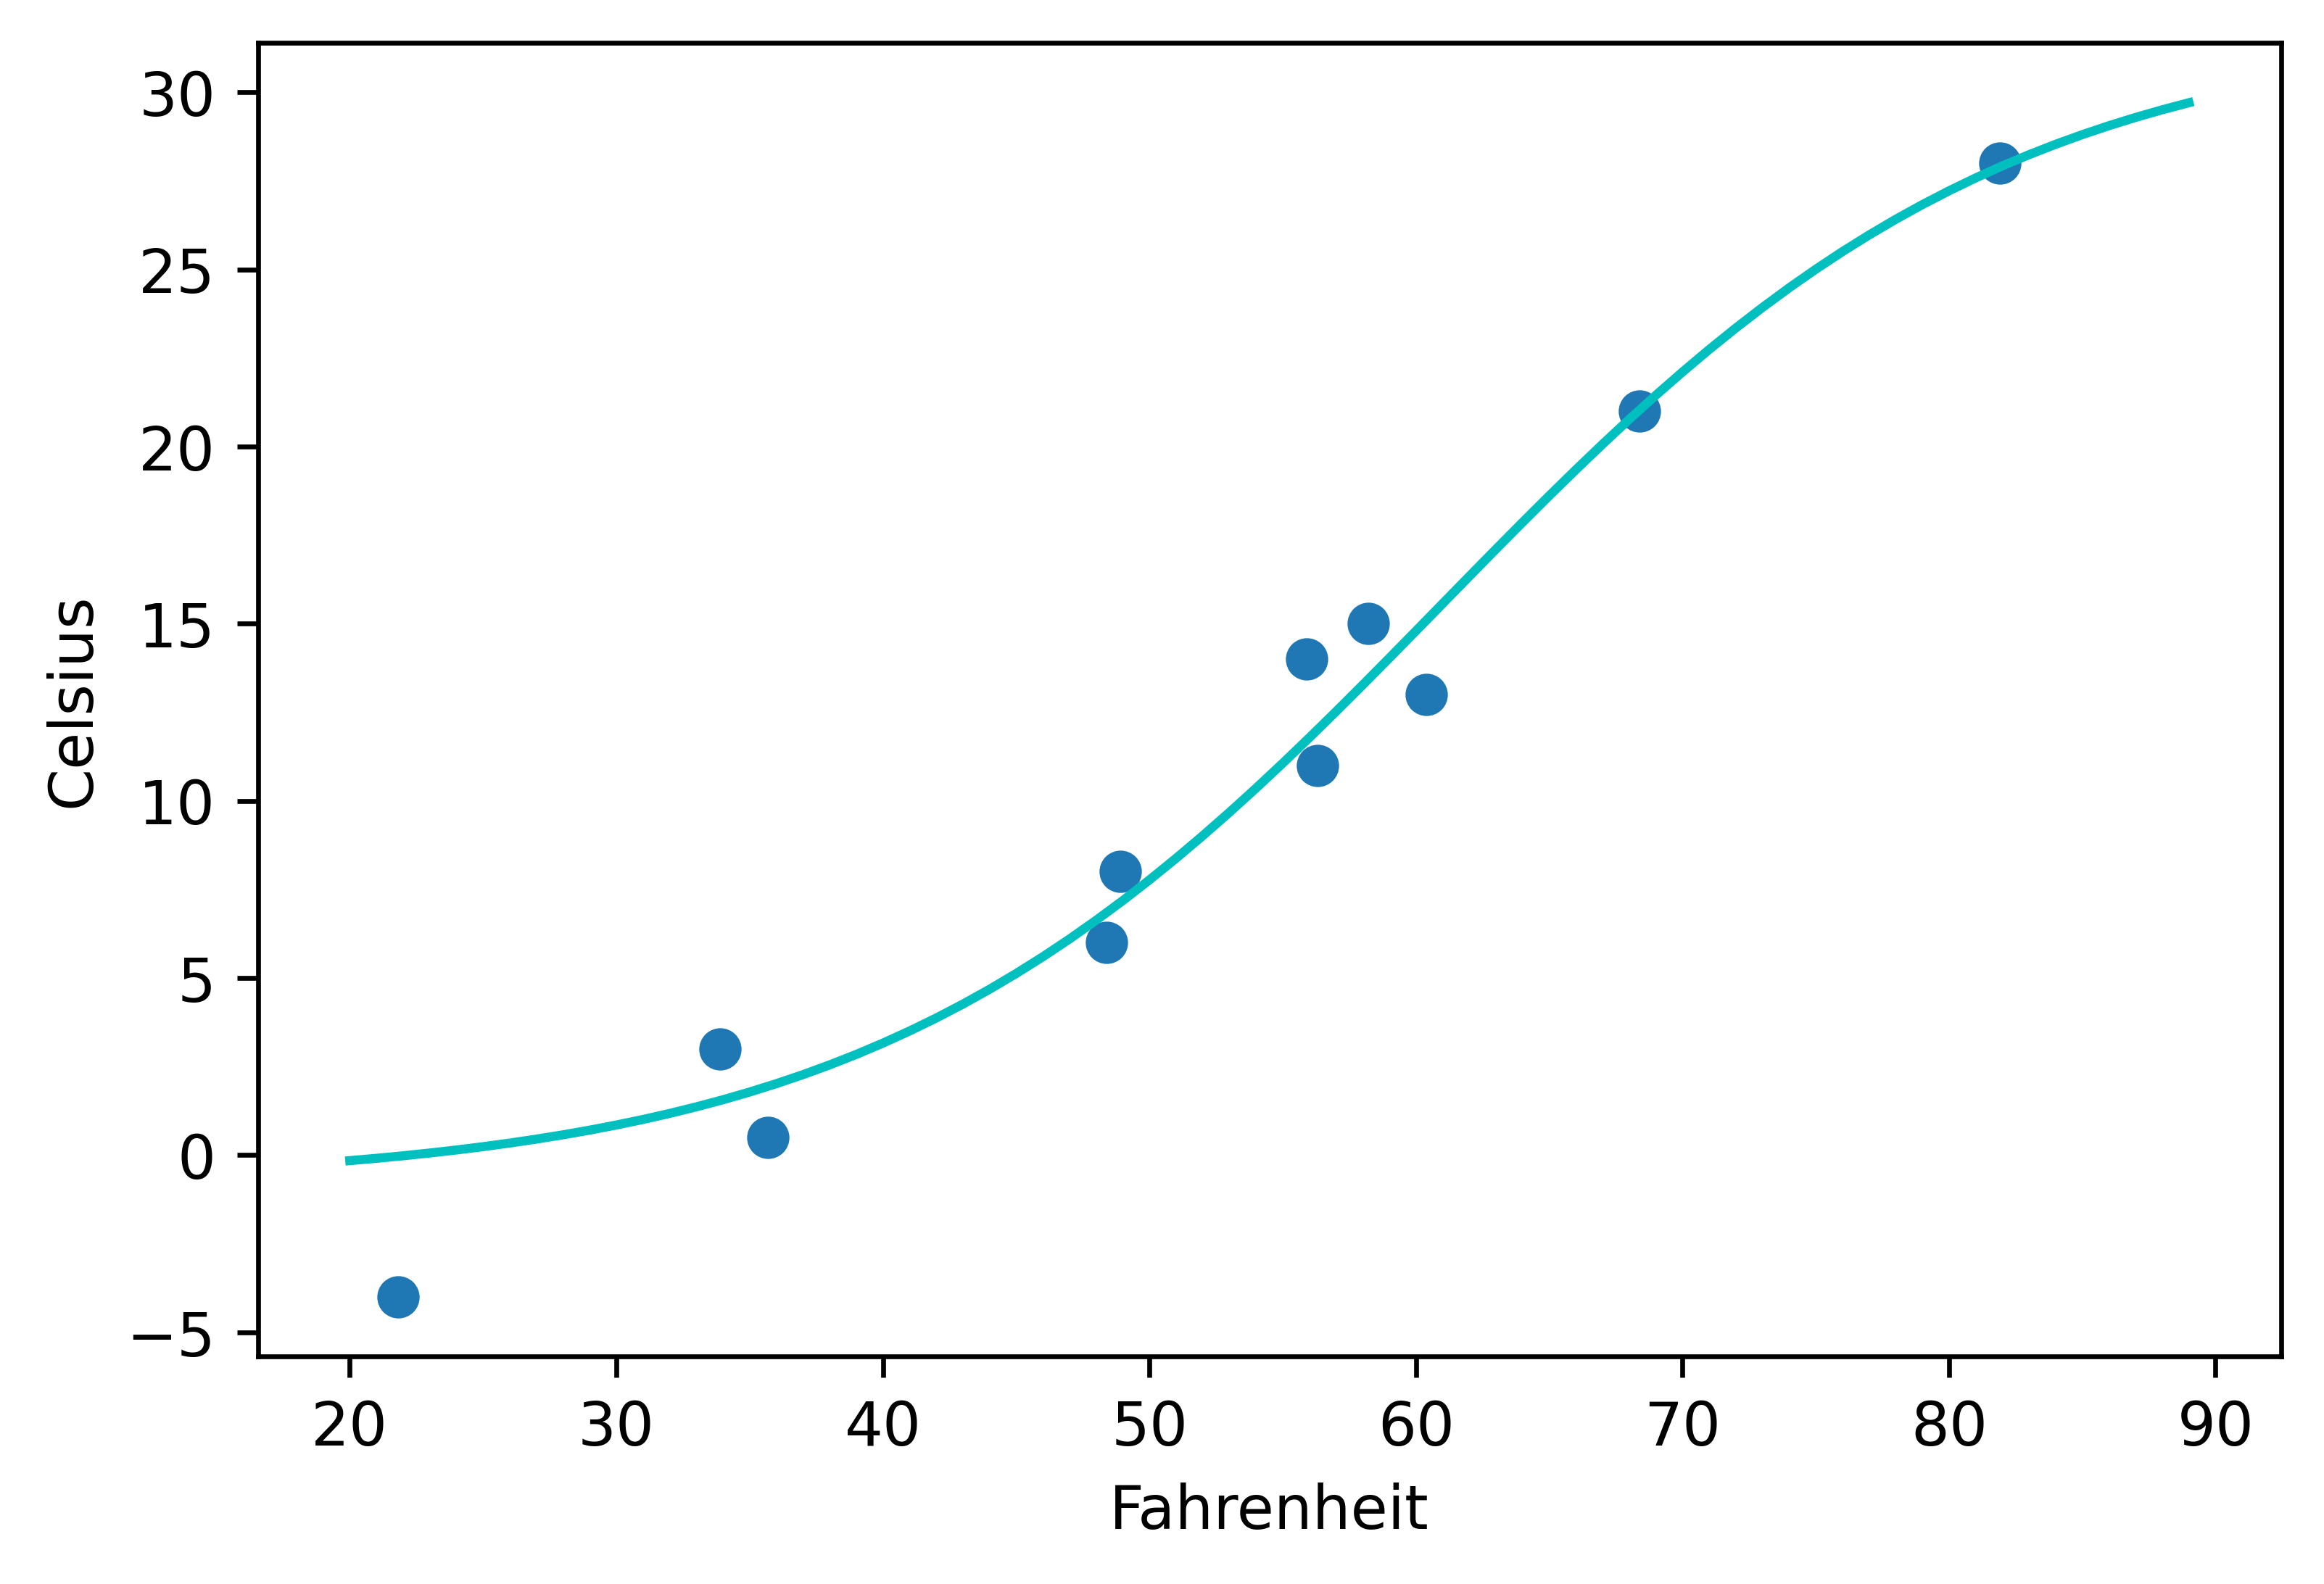

In [54]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(t_range).detach().numpy(), 'c-')
#plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
